# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [6]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

# --> Results (Paper vs. Here) are different (no dilation)! #
with the snippet dataset from Robust Time Series Chain Discovery with Incremental Nearest Neighbors (see chains_tilttable.ipynb), the results are the same.

## TiltABP_210_25000 Data (MP VII) ##
The arterial blood pressure (ABP) signal of a patient lying on a tilt table.

m = 180, length of a cardiac cycle (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) --> Results (Paper vs. Here) are different (no dilation)!

m = 200 (MP VII) --> Results (Paper vs. Here) are different (no dilation)!

m = 205 (own testing) --> Results (Paper vs. Here) are similar 

In [7]:
# Parameter
use_case = "chains"
data_name = "tilttable"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [8]:
# Hyperparameter
target_w = 205
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [9]:
# calculate:
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Running Experiment: target_w=205, m=None, offset=False, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=205, m=205, d=1, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=205, m=103, d=2, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=205, m=69, d=3, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=205, m=52, d=4, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=206, m=42, d=5, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=205, m=35, d=6, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=204, m=30, d=7, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=209, m=27, d=8, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=208, m=24, d=9, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=201, m=21, d=10, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w

Visualizing Experiment: target_w=205, m=None, offset=False, groundtruthD1=True, nonoverlapping=False
chain for d=1, m=205, w=205: [25233 25832 26422 27372 27566 27949 29506 32647 35252]
chain for d=2, m=103, w=205: [25232 25831 26421 27371 27565 27948 29505 32646 35251]
chain for d=3, m=69, w=205: [1602 1804 2599 2805 5118 5742 5948 6559 6762]
chain for d=4, m=52, w=205: [1492 1694 2489 6449 6652 6854 7637 8220 8417]
chain for d=5, m=42, w=206: [1493 1695 2490 6450 6653 6855 7638 8221 8418]
chain for d=6, m=35, w=205: [1502 1704 2499 6459 6662 6864 7647 8230 8427]
chain for d=7, m=30, w=204: [26332 26527 26719 27476 27859 28440 34040 35727 35920 36117 36710 37323]
chain for d=8, m=27, w=209: [25936 26525 26718 27475 27858 28439 34039 35726 35919 36116 36709]
chain for d=9, m=24, w=208: [25227 25826 26416 27366 27560 27943 29500 32641 35246]
chain for d=10, m=21, w=201: [25942 26531 26724 27481 27864 28445 34045 35732 35925 36122 36514]
chain for d=11, m=20, w=210: [ 4185  4818  5030  5

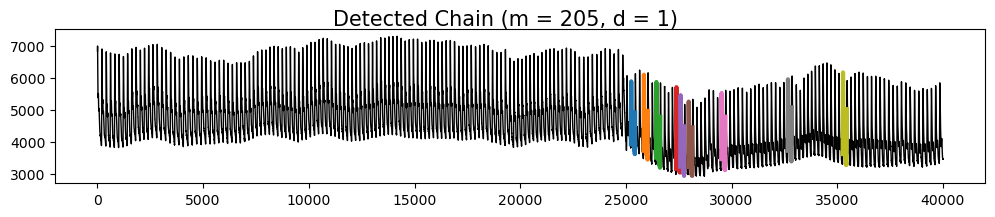

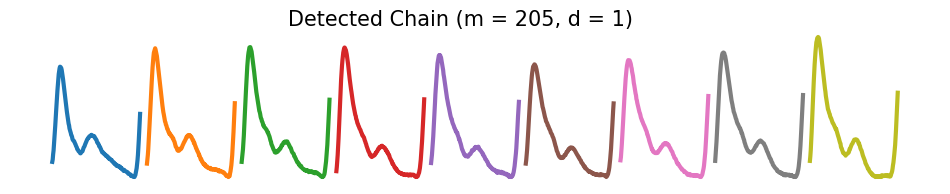

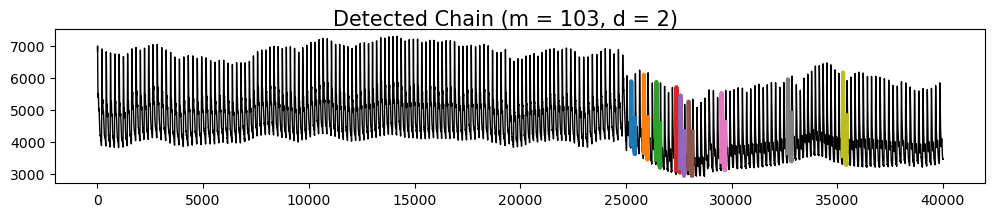

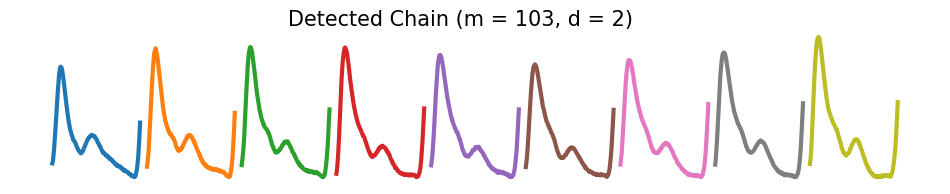

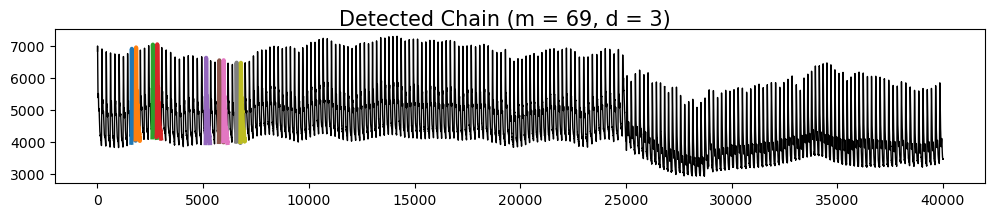

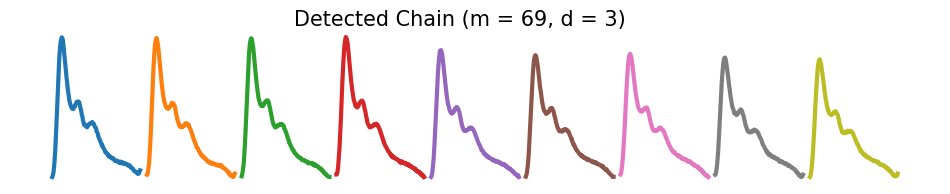

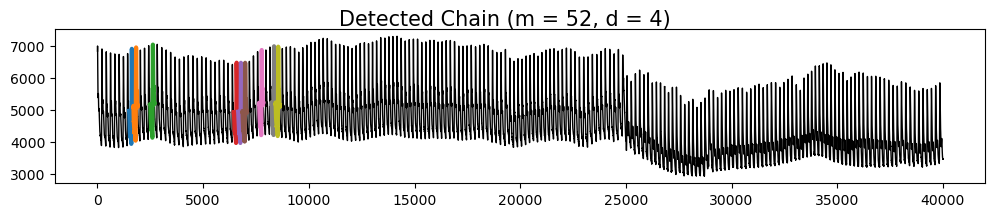

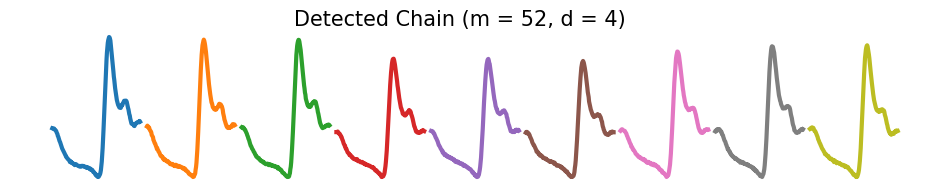

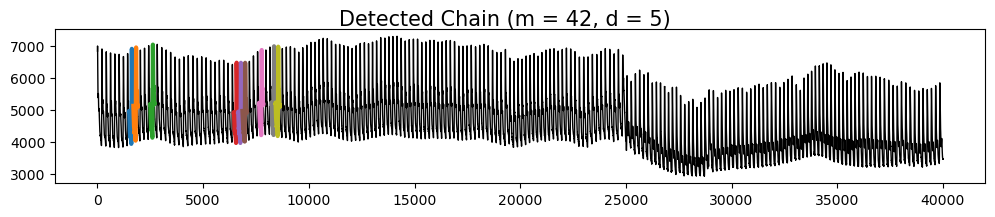

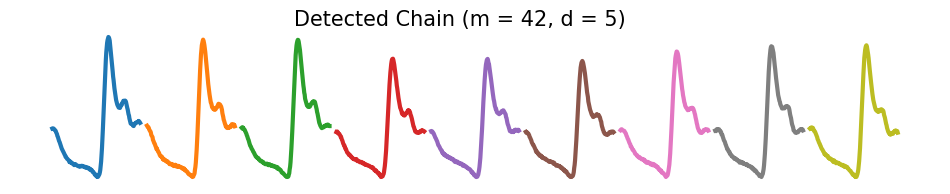

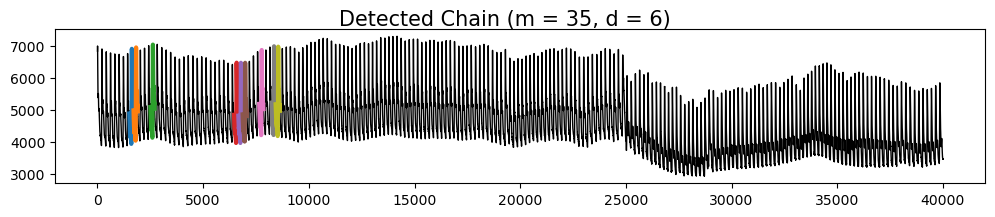

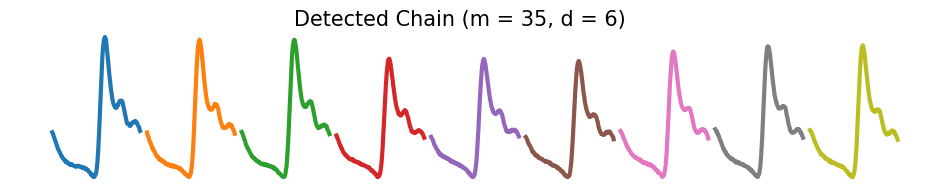

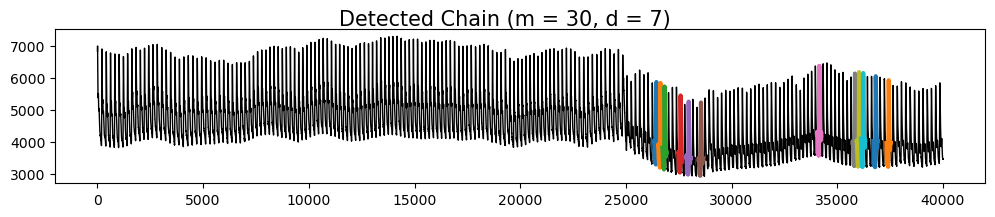

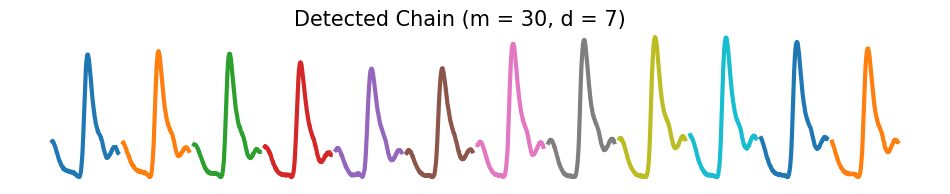

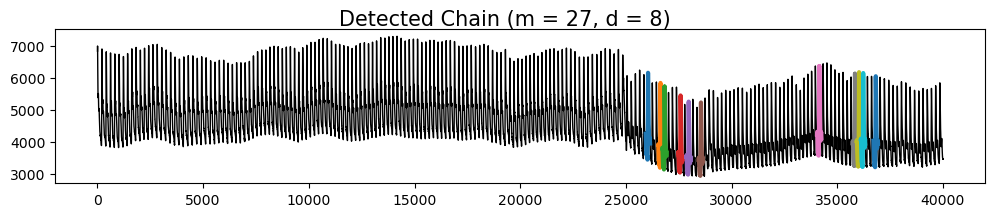

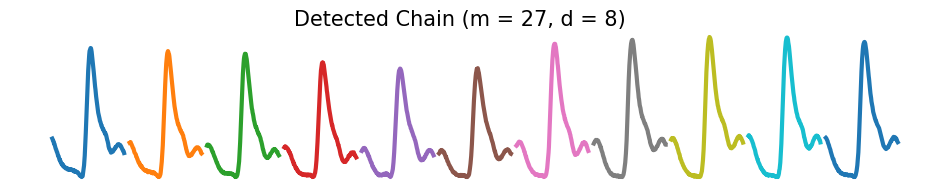

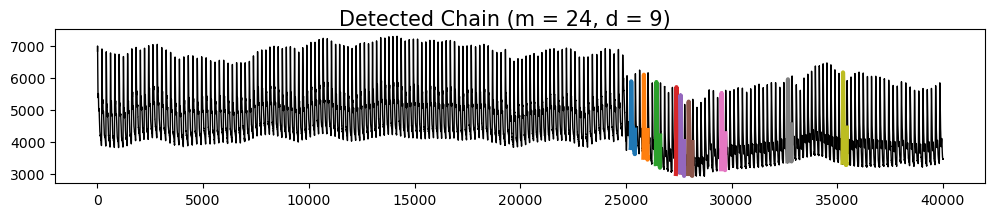

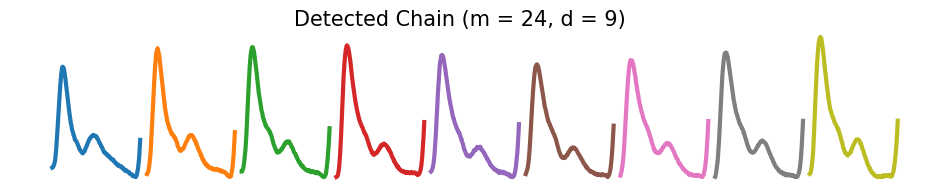

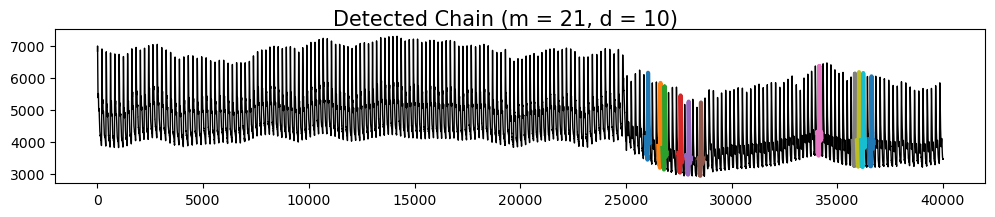

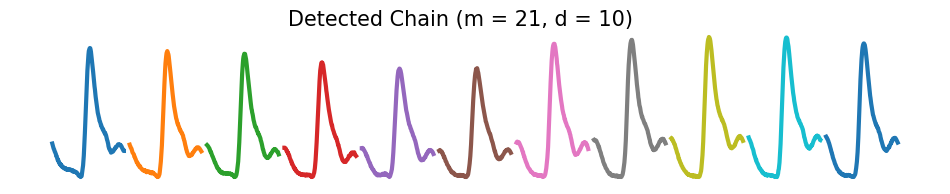

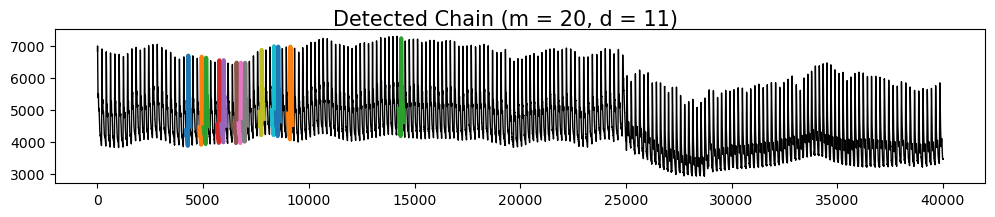

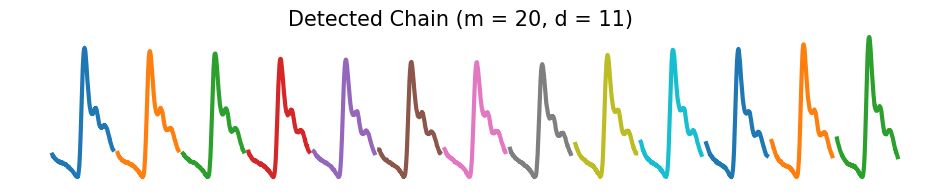

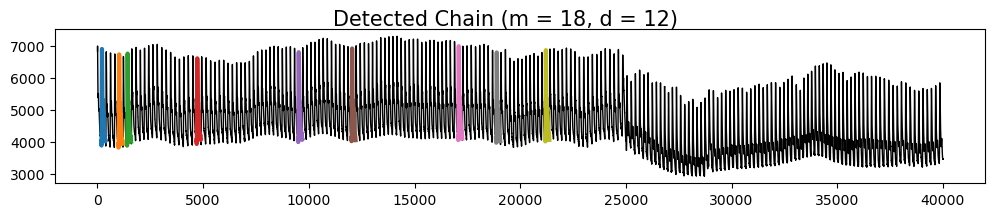

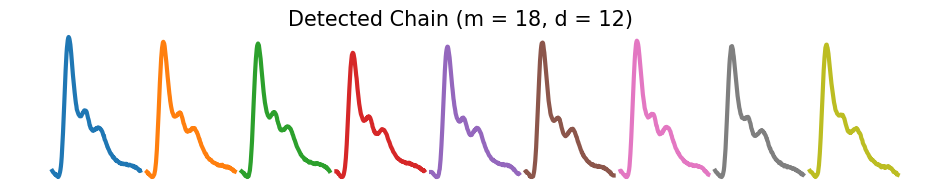

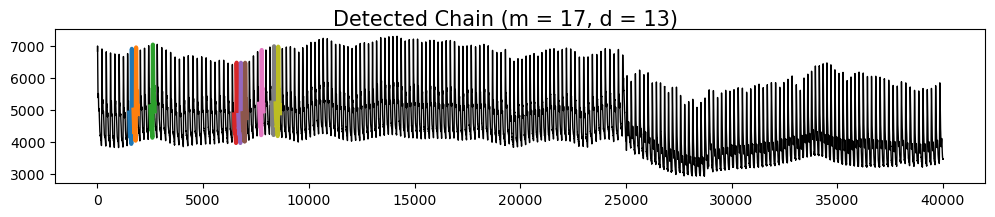

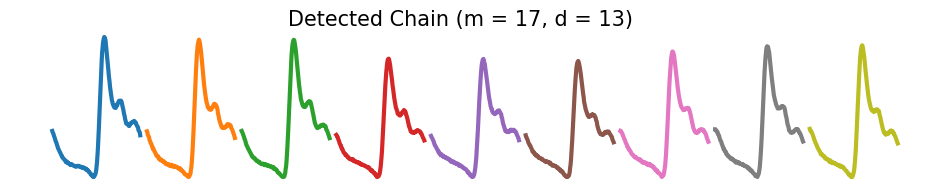

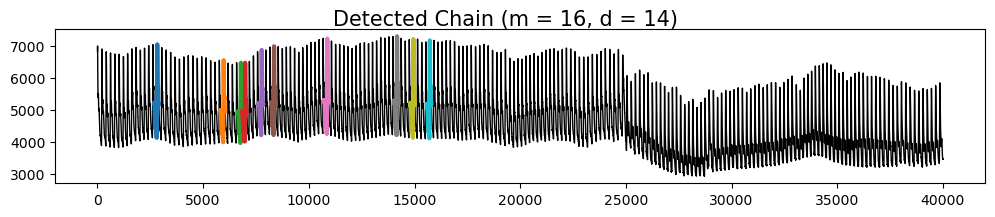

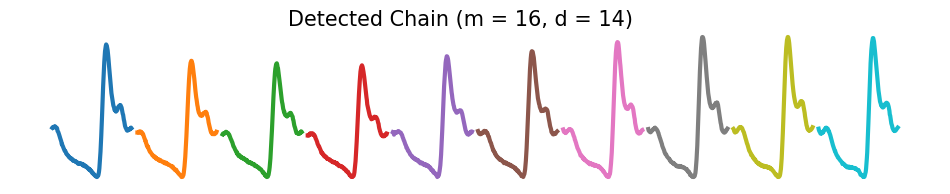

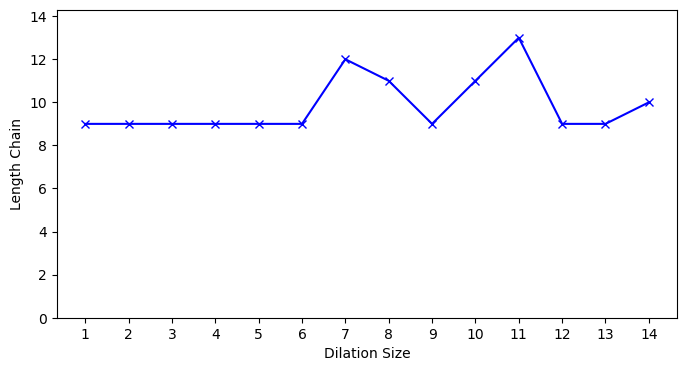

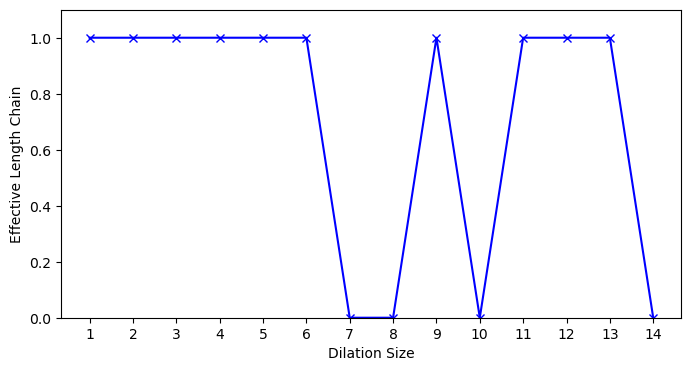

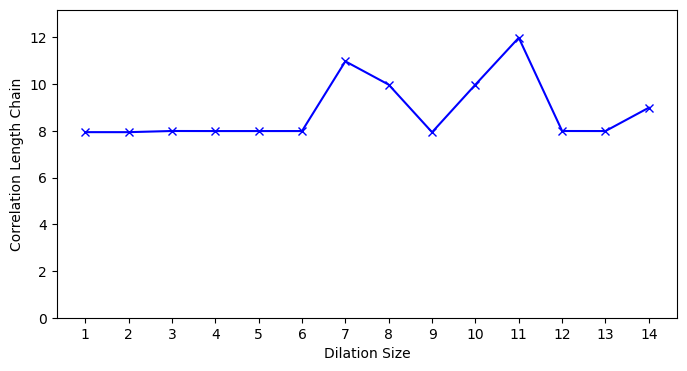

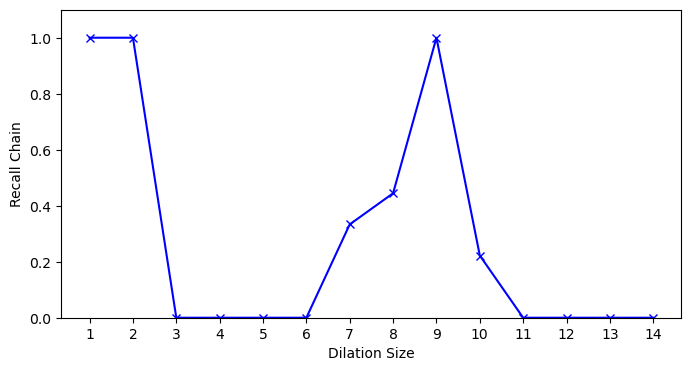

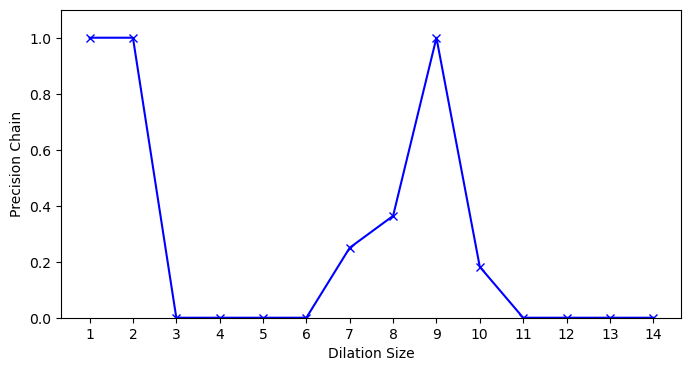

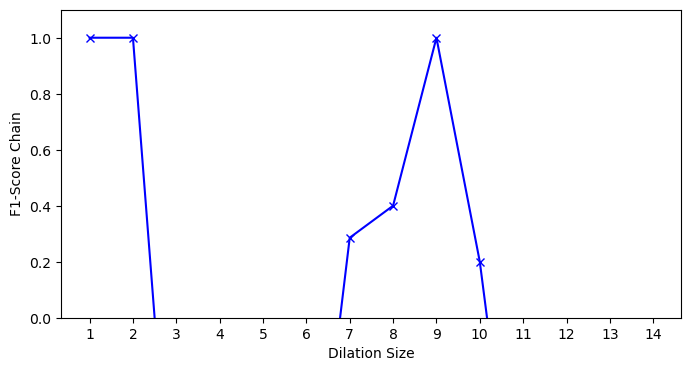

In [10]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)